# Titanic数据分析
通过对已提供的Titanic乘客数据进行分析，提出问题并解决问题！


### 提出问题： 

1. 性别是否会影响生还率？
2. 年龄是否会影响生还率？
3. 舱位是否会影响生还率？
4. 性别和舱位对生还率的共同影响


###### ps:试着提出那些调查多个变量之间的关系的问题。你应该在你的调查里分析至少一个因变量和三个自变量。在恰当的地方使用 NumPy 和 Pandas。

### 1.导入数据

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# 使用pandas读取CSV数据
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.数据理解
#### 这里我们记录一下数据字典方便理解数据

PassengerId  乘客ID

Survived  是否生还

Pclass  乘客等级(1/2/3等舱位)

Name  乘客姓名

Sex  性别

Age  年龄

SibSp  堂兄弟/妹个数

Parch  父母与小孩个数

Ticket  船票信息

Fare  票价

Cabin  客舱

Embarked  登船港口

In [2]:
#使用describe()方法查看数据的一些统计信息
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


通过快速统计信息我们可以大致看到，数据集中891个乘客的平均生还率为38%，乘客的平均年龄为29岁左右，不过有效年龄数据仅714个，
说明数据中存在100多年龄数据缺失，我们在后续处理数据时需要进行处理，乘客的舱位有50%以上分布在3等舱。


### 3.数据处理

In [3]:
# 查看数据集的数据缺失情况
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


可以看到年龄、船舱、登船港口存在数据缺失情况，由于我们后续需要用到年龄进行相关分析，所以这里我们需要对年龄的缺失值进行处理。
我们可以使用箱线图先查看下年龄的分布情况

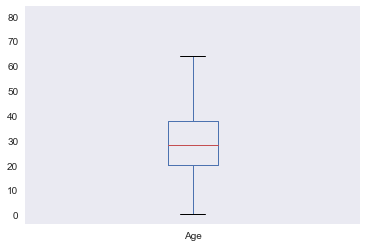

In [4]:
# 箱线图查看年龄分布情况
titanic_df.boxplot(column='Age', grid=False)

从箱线图可以看出，有一半乘客的年龄分布在20岁-40岁之间，中位数约为30岁，基本与平均年龄相当，所以这里我们对年龄的缺失值处理方式为填充为中位数。

In [5]:
# 获取年龄中位数并填充缺失年龄的数据
passenger_age_median = titanic_df['Age'].median()
titanic_df['Age'].fillna(passenger_age_median,inplace=True)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 处理性别数据，将性别转换为0和1
titanic_df['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### 4.数据探索

In [7]:
# 获得生还的乘客数据
passenger_survived = titanic_df[titanic_df['Survived']==1]
passenger_survived.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# 定义数据处理方法，方便后面使用
# 定义一个数据分组方法，并返回分组的count数
def groupby_name_count(data, name):
    return data.groupby(name)['PassengerId'].count()

# 定义按不同维度统计存活率的方法
def groupby_rate_survived(name):
    # 分组后各组生还下来的人数
    survived_count = groupby_name_count(passenger_survived,name)
    # 分组后各组的总人数
    passenger_count = groupby_name_count(titanic_df,name)
    return survived_count/passenger_count

#### 4.1性别对生还率的影响

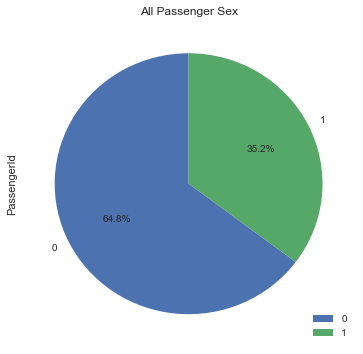

In [9]:
# 全体乘客的性别分布
passengers_all_sex =  groupby_name_count(titanic_df,'Sex')
passengers_all_sex.plot.pie(title='All Passenger Sex',figsize=(6, 6),autopct='%3.1f%%',startangle = 90,legend=True)

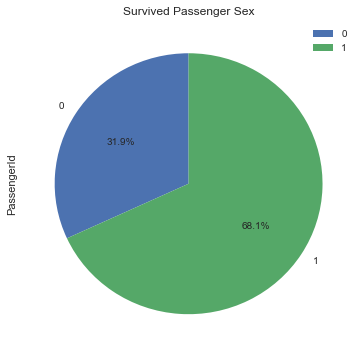

In [10]:
# 存活乘客的性别分布
passengers_survived_sex =  groupby_name_count(passenger_survived,'Sex')
passengers_survived_sex.plot.pie(title='Survived Passenger Sex',figsize=(6, 6),autopct='%3.1f%%',startangle = 90,legend=True)

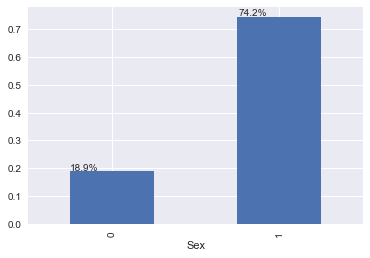

In [11]:
# 不同性别生还率分析
rate_survived_sex = groupby_rate_survived('Sex')
bar = rate_survived_sex.plot(kind='bar')
for p in bar.patches:
        bar.annotate('%3.1f%%' % (p.get_height()*100), (p.get_x() * 1.009, p.get_height() * 1.009))

# titanic_df.groupby(['Sex']).Survived.sum().plot(kind='barh') 

由以上数据可以看出：
1. 全体乘客中，男性乘客约占64.8%，女性乘客约占35.2%
2. 生还乘客中，男性占比31.9%，女性占比68.1%
3. 全体乘客中，男性生还率仅为18.9%，女性乘客生还率为74.2%

由此我们可以知道，女性乘客的生还率更高

#### 4.2年龄对生还率的影响

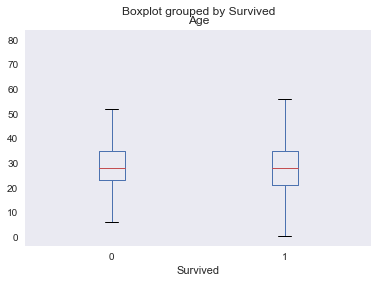

In [12]:
# 生还乘客以及整体的平均年龄箱型图
titanic_df.boxplot(column='Age', by='Survived', grid=False)

In [13]:
print '生还乘客的平均年龄为：%s' %passenger_survived['Age'].mean()
print ''
print '全体乘客的平均年龄为：%s' %titanic_df['Age'].mean()

生还乘客的平均年龄为：28.2914327485

全体乘客的平均年龄为：29.3615824916


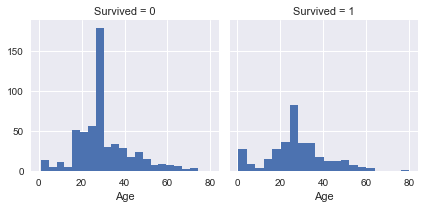

In [14]:
# 分析生还与非生还乘客的年龄分布
g = sns.FacetGrid(titanic_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

通过年龄分布的直方图可以看出，生还与非生还乘客的年龄分布十分相似，这里我们对年龄段进行划分，统计一下在不同年龄区间的生还率。


In [15]:
titanic_df_age = titanic_df
bins = np.arange(0, 80, 10)
titanic_df_age['Age_interval'] = pd.cut(titanic_df_age['Age'], bins)
by_Age = titanic_df_age.groupby('Age_interval')['Survived'].mean()

In [16]:
by_Age

Age_interval
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
Name: Survived, dtype: float64

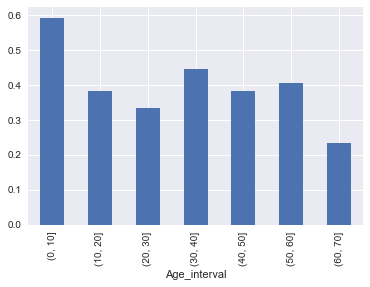

In [17]:
# 计算不同年龄区间的存活率
by_Age.plot(kind='bar')

我们可以看出:
1. 生还乘客和全体乘客的年龄均值非常接近，从直方图上看，年龄分布也非常接近。
2. 超越平均生还率38.3%的年龄分布在0-10、30-40、50-60这几个年龄区间。
3. 年龄分布直方图上有一条年龄柱形比较突出，是因为我们对年龄的缺失值采取了中位数填充导致的。

#### 4.3舱位对生还率的影响

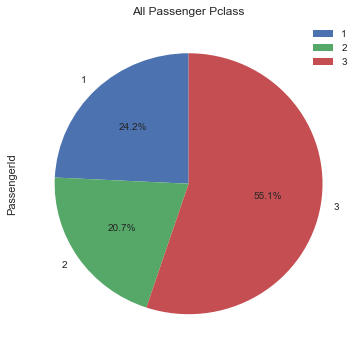

In [18]:
# 全体乘客的舱位情况
passengers_all_sex =  groupby_name_count(titanic_df,'Pclass')
passengers_all_sex.plot.pie(title='All Passenger Pclass',figsize=(6, 6),autopct='%3.1f%%',startangle = 90,legend=True)

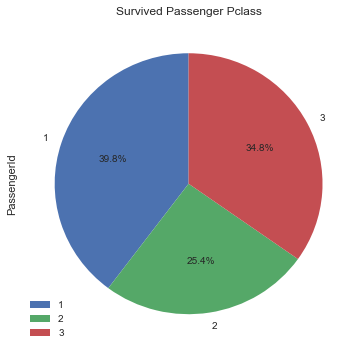

In [19]:
# 生还乘客的舱位情况
passengers_survived_sex =  groupby_name_count(passenger_survived,'Pclass')
passengers_survived_sex.plot.pie(title='Survived Passenger Pclass',figsize=(6, 6),autopct='%3.1f%%',startangle = 90,legend=True)

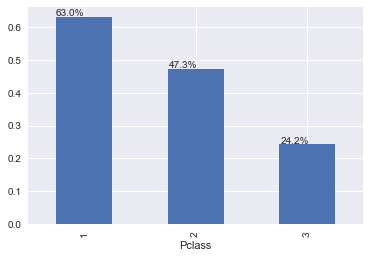

In [20]:
# 不同舱位的生还率
rate_survived_sex = groupby_rate_survived('Pclass')
bar = rate_survived_sex.plot(kind='bar')
for p in bar.patches:
        bar.annotate('%3.1f%%' % (p.get_height()*100), (p.get_x() * 1.009, p.get_height() * 1.009))

我们可以看出：
1. 全体乘客中，3等舱的乘客最多，占比55.1%，1等舱和2等舱乘客所占比例较为接近。
2. 生还乘客中，1等舱乘客占比最高，为39.8%，其次为3等舱乘客，占比34.8%，最后为2等舱乘客，占比25.4%。
3. 从不同舱位的生还率柱状图中可以看出，生还率随着舱位等级逐渐下降，1等舱生还率最高，为63%，2等舱和3等舱分别为47.3%和24.2%。

#### 4.4舱位和性别对生还率的影响

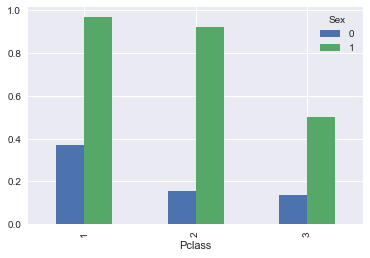

In [21]:
# 不同舱位的生还率
by_class_sex = titanic_df.groupby(['Pclass', 'Sex'])['Survived'].mean()
by_class_sex.unstack().plot(kind = 'bar')

我们可以看出，对生还率的影响来说，性别和舱位中，性别占首要因素，女性的生还率要明显高于男性。

其次是舱位，1等舱生还率最高，其次是2等舱和3等舱。

### 5.结论

通过以上统计分析，我们目前可以得出如下结论：
1. 对生还率影响最大的是性别因素，其次是舱位因素。
2. 部分年龄段对生还率的影响比较大。

##### 限制因素：
由于只针对数据里的舱位、性别、年龄三个因素对生还率的影响做了分析，并没有考虑其他因素的影响，同时由于年龄数据的缺失，对年龄做了填充处理，所以会对分析的结果造成一定影响。

由于数据并非是由实验得出，所以无法说自变量和因变量之间有因果性，只能说它们之间有相关性。